In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("data.csv", names=["x1", "x2"])
df

,x1,x2
0,-0.0824,0.9435
1,0.0913,0.9575
2,0.0476,1.0683
3,0.2311,1.0452
4,0.2269,0.9615
...,...,...
96,-0.5031,1.8191
97,-0.3340,1.8515
98,-0.3200,1.9158
99,-0.2074,1.9929


In [9]:
def plot_k_means(df: pd.DataFrame, center_points: pd.DataFrame, iteration: int) -> None:
    plt.scatter(df["x1"], df["x2"], c=df["nearest_center"])
    plt.scatter(center_points["x1"], center_points["x2"], c="red", s=100, marker="X")
    plt.title(f"Wykres dla iteracji: {iteration}")
    plt.show()

In [10]:
from typing import Callable, Optional
def k_means(
        m: int,
        iters: int,
        df: pd.DataFrame,
        miara: Callable,
        plot_iters: list | None = None,
        position_iters: list | None = None,
) -> tuple[pd.DataFrame, pd.DataFrame]:
    center_points = df.sample(m).reset_index(drop=True)
    df["nearest_center"] = None
    for iter in range(iters):
        for i, row in df.iterrows():
            distances = {}
            for j, center_point in center_points.iterrows():
                distance = miara((row["x1"], row["x2"]), (center_point["x1"], center_point["x2"]))
                distances[j] = distance
            min_center = min(distances, key=distances.get)
            df.at[i, "nearest_center"] = min_center

        groups_id = df['nearest_center'].unique()
        groups = df.groupby(['nearest_center'])
        for group_id in groups_id:
            group = groups.get_group((group_id,))
            if group.shape[0] == 0:
                continue
            center_points.loc[group_id, "x1"] = group["x1"].mean()
            center_points.loc[group_id, "x2"] = group["x2"].mean()

        if position_iters and iter + 1 in position_iters:
            # Położenie każdego ze środków
            print("Położenie każdego ze środków")
            print(center_points)
            # liczba próbek należących do każdej z tych grup
            for group_id in groups_id:
                group = groups.get_group((group_id,))
                print(f"numer grupy: {group_id}")
                print(f"liczba próbek {group.shape[0]}")
                # minimalna i maksymalna wartość obu parametrów (x1, x2) próbek należących dla każdej z tych grup.
                print(f"minimalna wartość x1 {group["x1"].min()}")
                print(f"maksymalna wartość x1 {group["x1"].min()}")
                print(f"minimalna wartość x2 {group["x2"].max()}")
                print(f"maksymalna wartość x2 {group["x2"].max()}")

        if plot_iters and iter + 1 in plot_iters:
            plot_k_means(df, center_points, iter + 1)
            plot_iters.remove(iter + 1)

    return df, center_points


In [11]:
def miara_euklidesowa(pa, pb):
    return np.sqrt((pa[0] - pb[0])**2 + (pa[1] - pb[1])**2)

def miara_custom(pa, pb):
    return abs(pa[0] - pb[0])

# Raport 1

Położenie każdego ze środków
         x1        x2
0 -1.465119 -0.137345
1  0.604865 -0.976700
2  0.235569  1.087092
numer grupy: 2
liczba próbek 36
minimalna wartość x1 -1.1918
maksymalna wartość x1 -1.1918
minimalna wartość x2 1.9929
maksymalna wartość x2 1.9929
numer grupy: 1
liczba próbek 34
minimalna wartość x1 -0.6295
maksymalna wartość x1 -0.6295
minimalna wartość x2 0.1041
maksymalna wartość x2 0.1041
numer grupy: 0
liczba próbek 31
minimalna wartość x1 -1.779
maksymalna wartość x1 -1.779
minimalna wartość x2 1.3016
maksymalna wartość x2 1.3016


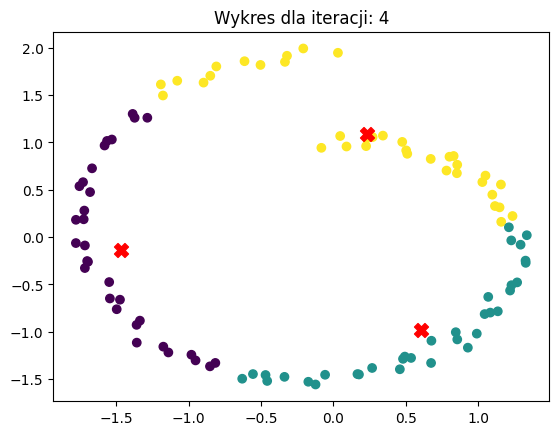

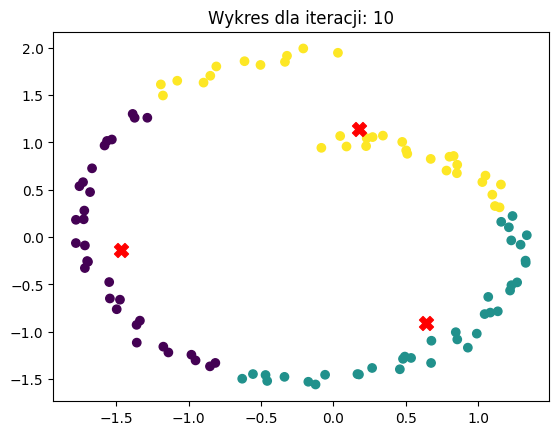

In [12]:
m = 3
iters = 10

df, center_points = k_means(m, iters, df, miara_euklidesowa, [4, 10], [4])

# Raport 2

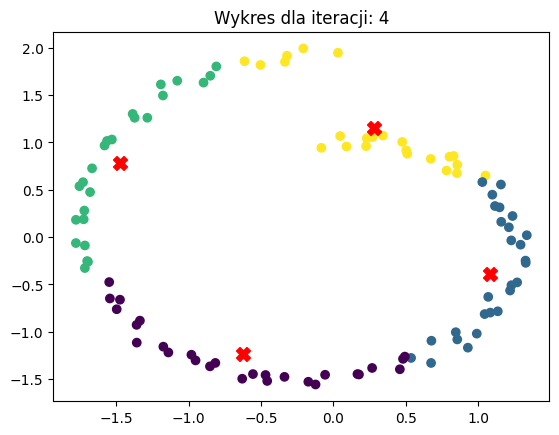

Położenie każdego ze środków
         x1        x2 nearest_center
0 -0.759125 -1.220475              1
1  1.015474 -0.591456              2
2 -1.474521  0.780213              2
3  0.377573  1.084823              2
numer grupy: 3
liczba próbek 26
minimalna wartość x1 -0.6135
maksymalna wartość x1 -0.6135
minimalna wartość x2 1.9929
maksymalna wartość x2 1.9929
numer grupy: 1
liczba próbek 27
minimalna wartość x1 0.4601
maksymalna wartość x1 0.4601
minimalna wartość x2 0.3286
maksymalna wartość x2 0.3286
numer grupy: 0
liczba próbek 24
minimalna wartość x1 -1.5488
maksymalna wartość x1 -1.5488
minimalna wartość x2 -0.4747
maksymalna wartość x2 -0.4747
numer grupy: 2
liczba próbek 24
minimalna wartość x1 -1.779
maksymalna wartość x1 -1.779
minimalna wartość x2 1.8031
maksymalna wartość x2 1.8031


In [13]:
m = 4
iters = 10

df, center_points = k_means(m, iters, df, miara_euklidesowa, [4], [10])